<a href="https://colab.research.google.com/github/benjaminnigjeh/keyProteoforms/blob/main/tSNE_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

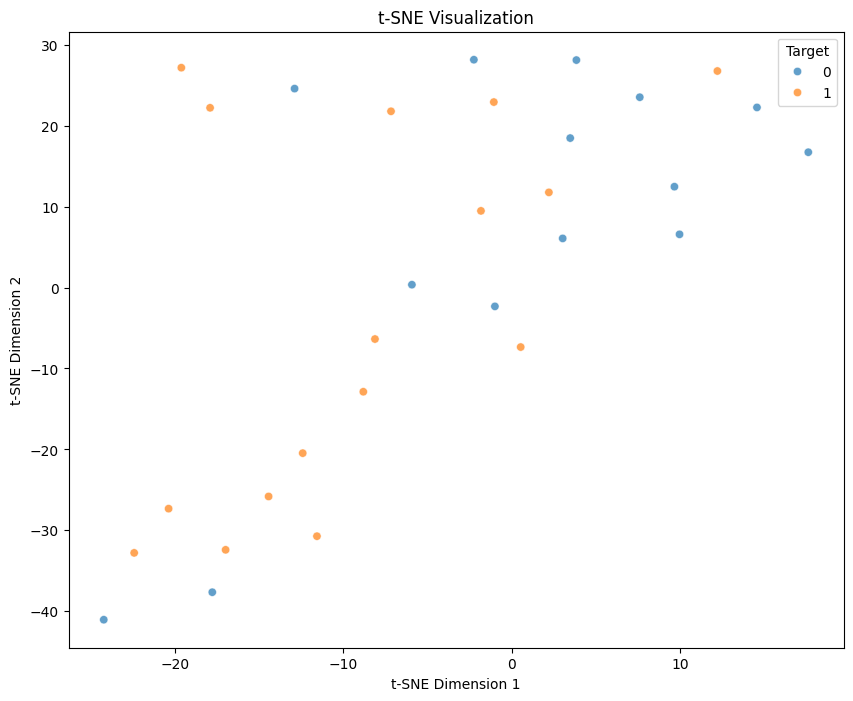

In [13]:
# Step 2: Load the CSV into a DataFrame
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv("/content/protein_pellet.csv")

# Step 3: Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Step 4: Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Determine appropriate perplexity
n_samples = X_scaled.shape[0]
# Set perplexity to a value less than n_samples
# For example, use min(30, (n_samples - 1) // 3)
perplexity = min(30, max(5, (n_samples - 1) // 3))

# Step 6: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

# Step 7: Create a DataFrame for visualization
import numpy as np
df_tsne = pd.DataFrame({
    'tsne-1': X_embedded[:, 0],
    'tsne-2': X_embedded[:, 1],
    'label': y
})

# Step 8: Visualize the t-SNE result
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne-1', y='tsne-2',
    hue='label',
    palette='tab10',
    data=df_tsne,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Target')
plt.show()
